# Embeddings y similaridad

Vamos a usar GenSim, una librería para topic modelling pero que la utilizaremos más que nada para acceder a los vectores

In [1]:
!pip install gensim 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import gensim.downloader as api

api.info().keys()

dict_keys(['corpora', 'models'])

In [3]:
api.info()["models"].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

Ninguno en español :-(

Empecemos con GloVe

In [4]:
model = api.load("glove-wiki-gigaword-300")  # load glove vectors

[==================================================] 100.0% 376.1/376.1MB downloaded


Veamos el vocabulario que tiene

In [6]:
len(model.index_to_key)

400000

Tiene 400k palabras

Para obtener el vector de una palabra, tenemos que hacer lo siguiente

In [9]:
idx = model.key_to_index["banana"]
vec = model.vectors[idx]

model.vectors.shape

(400000, 300)

O más fácil, usar `model.get_vector`

In [10]:
model.get_vector("banana")

array([ 4.2141e-01,  2.0467e-02,  1.2666e-01,  3.9762e-01, -1.1016e-01,
       -3.5956e-02, -4.7214e-01, -1.3916e-01,  5.6812e-01, -3.4969e-01,
       -9.3232e-02, -1.7035e-01, -3.8677e-01, -1.6811e-01, -1.0157e-01,
       -2.6612e-01,  4.8094e-02, -4.6771e-01, -6.0725e-01,  4.0952e-01,
        3.1771e-01,  5.0098e-01,  6.6368e-01, -1.1827e-01, -7.4267e-01,
       -1.0472e-01, -6.4353e-01, -4.4023e-01, -3.9101e-01,  3.5694e-01,
       -9.3489e-01,  4.8317e-01,  1.5223e-01,  7.9339e-02, -2.5111e-01,
        3.9968e-01, -1.7982e-01, -2.8874e-01, -1.0891e-01,  3.8821e-01,
       -2.3147e-01, -5.0337e-01, -2.5231e-01, -2.2184e-02, -2.7874e-01,
       -2.4193e-01,  5.7466e-02, -5.3955e-01, -3.4875e-02, -4.0482e-01,
       -3.8067e-02, -4.2337e-01,  4.2861e-01,  3.5166e-01, -1.8165e-01,
       -3.1131e-01, -5.3276e-01, -5.0954e-02,  6.6779e-01, -4.0077e-01,
        2.1403e-01, -2.9861e-01, -3.6637e-01,  2.8489e-01, -3.7663e-01,
        5.9604e-02, -3.1795e-01,  2.5463e-01, -2.2185e-01,  2.30

## Ejercicio:

Implementar distancia coseno entre dos vectores

Recordar que, si tengo $v_1, v_2 \in \mathbb{R}^n$, con un ángulo entre ellos $\alpha \in [0, 2\pi)$, tenemos que:

$$
cos(\alpha) = \frac{\langle v_1, v_2 \rangle}{\|v_1\| \|v_2\|}
$$

Usar `np.dot` y `np.linalg.norm` para calcular esto

In [11]:
import numpy as np

def cossim(v1, v2):
    """
    TODO: Completar
    """
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

banana = model.get_vector("banana") 
pineapple = model.get_vector("pineapple")
tree = model.get_vector("tree")
star = model.get_vector("star")

print(f"Similaridad banana - pineapple: {cossim(banana, pineapple):.4f}")
print(f"Similaridad banana - tree: {cossim(banana, tree):.4f}")
print(f"Similaridad banana - star: {cossim(banana, star):.4f}")

Similaridad banana - pineapple: 0.5492
Similaridad banana - tree: 0.3496
Similaridad banana - star: 0.0333


Bien, algo hay acá

In [13]:
word = "obama"
similarities = []

word_vector = model.get_vector(word)

for other_word in model.key_to_index.keys():
    other_word_vector = model.get_vector(other_word)
    similarity = cossim(word_vector, other_word_vector)
    similarities.append({
        "word": other_word,
        "sim": similarity,
    })



In [15]:
sorted(similarities, key=lambda f: f["sim"], reverse=True)

[{'word': 'obama', 'sim': 0.99999994},
 {'word': 'barack', 'sim': 0.92547214},
 {'word': 'mccain', 'sim': 0.75907695},
 {'word': 'bush', 'sim': 0.75709885},
 {'word': 'clinton', 'sim': 0.7085603},
 {'word': 'hillary', 'sim': 0.6497916},
 {'word': 'kerry', 'sim': 0.6144053},
 {'word': 'rodham', 'sim': 0.61386347},
 {'word': 'biden', 'sim': 0.59408516},
 {'word': 'gore', 'sim': 0.58859766},
 {'word': 'democrats', 'sim': 0.5608304},
 {'word': 'republicans', 'sim': 0.5388997},
 {'word': 'senator', 'sim': 0.53833956},
 {'word': 'presidential', 'sim': 0.5349615},
 {'word': 'romney', 'sim': 0.5313055},
 {'word': 'administration', 'sim': 0.5305255},
 {'word': 'aides', 'sim': 0.51924235},
 {'word': 'sarkozy', 'sim': 0.5056604},
 {'word': 'palin', 'sim': 0.5008039},
 {'word': 'cheney', 'sim': 0.49713778},
 {'word': 'campaign', 'sim': 0.49369255},
 {'word': 'dole', 'sim': 0.4924144},
 {'word': 'nominee', 'sim': 0.48723623},
 {'word': 'republican', 'sim': 0.47844192},
 {'word': 'senate', 'sim': 0.

In [16]:
def most_similar(word, top=10):
    """
    TODO: completar
    """

    similarities = []

    word_vector = model.get_vector(word)

    for other_word in model.key_to_index.keys():
        if other_word == word:
            continue
        other_word_vector = model.get_vector(other_word)
        similarity = cossim(word_vector, other_word_vector)
        similarities.append({
            "word": other_word,
            "sim": similarity,
        })

    
    sorted_words = sorted(similarities, key=lambda fila: fila["sim"], reverse=True)

    return sorted_words[:top]

In [17]:
most_similar("trump")

[{'word': 'ivana', 'sim': 0.4999053},
 {'word': 'melania', 'sim': 0.456515},
 {'word': 'casino', 'sim': 0.45222753},
 {'word': 'nows', 'sim': 0.44631347},
 {'word': 'knauss', 'sim': 0.43607485},
 {'word': 'hilton', 'sim': 0.42345145},
 {'word': 'trumps', 'sim': 0.41433755},
 {'word': 'ivanka', 'sim': 0.40609348},
 {'word': 'resorts', 'sim': 0.39928275},
 {'word': 'wynn', 'sim': 0.3902422}]

In [18]:
most_similar("messi")

[{'word': "eto'o", 'sim': 0.7322823},
 {'word': 'ronaldinho', 'sim': 0.7160847},
 {'word': 'iniesta', 'sim': 0.6984628},
 {'word': 'ronaldo', 'sim': 0.6775637},
 {'word': 'xavi', 'sim': 0.6665406},
 {'word': 'tevez', 'sim': 0.63291955},
 {'word': 'barca', 'sim': 0.6194374},
 {'word': 'ibrahimovic', 'sim': 0.6173138},
 {'word': 'saviola', 'sim': 0.60916907},
 {'word': 'riquelme', 'sim': 0.5935913}]

In [19]:
most_similar('germany')

[{'word': 'german', 'sim': 0.74909145},
 {'word': 'austria', 'sim': 0.66274256},
 {'word': 'berlin', 'sim': 0.64560443},
 {'word': 'europe', 'sim': 0.5969494},
 {'word': 'munich', 'sim': 0.58591354},
 {'word': 'poland', 'sim': 0.5792826},
 {'word': 'switzerland', 'sim': 0.57723916},
 {'word': 'germans', 'sim': 0.5746946},
 {'word': 'denmark', 'sim': 0.55928576},
 {'word': 'france', 'sim': 0.55673975}]

In [20]:
model.most_similar("argentina")

[('argentine', 0.6973999738693237),
 ('uruguay', 0.6948851943016052),
 ('brazil', 0.672882080078125),
 ('chile', 0.6578306555747986),
 ('paraguay', 0.6330372095108032),
 ('buenos', 0.6062374711036682),
 ('ecuador', 0.5989265441894531),
 ('spain', 0.5970550775527954),
 ('aires', 0.5959052443504333),
 ('peru', 0.5835303068161011)]

In [21]:
model.most_similar("kirchner")

[('cristina', 0.6217897534370422),
 ('néstor', 0.6090612411499023),
 ('nestor', 0.5978811383247375),
 ('duhalde', 0.5715010166168213),
 ('menem', 0.5673118233680725),
 ('lula', 0.5261633992195129),
 ('inacio', 0.5019150972366333),
 ('peronist', 0.48612818121910095),
 ('fernandez', 0.4857368469238281),
 ('cardoso', 0.46038442850112915)]

## Analogías

Programar la función de analogías, que intenta 

Chequear en algunos ejemplos: "man is to king, as woman is to ..."


In [23]:
x1 = "japan"
x2 = "japanese"
y1 = "australia"

vector_x1 = model.get_vector(x1)
vector_x2 = model.get_vector(x2)
vector_y1 = model.get_vector(y1)

word_vector = vector_y1 + (vector_x2 - vector_x1)

similarities = []


for other_word in model.key_to_index.keys():
    if other_word == word:
        continue
    other_word_vector = model.get_vector(other_word)
    similarity = cossim(word_vector, other_word_vector)
    similarities.append({
        "word": other_word,
        "sim": similarity,
    })


sorted_words = sorted(similarities, key=lambda fila: fila["sim"], reverse=True)



In [24]:
sorted_words[:10]

[{'word': 'australian', 'sim': 0.8366031},
 {'word': 'australia', 'sim': 0.73174477},
 {'word': 'zealand', 'sim': 0.62023604},
 {'word': 'australians', 'sim': 0.61165917},
 {'word': 'sydney', 'sim': 0.55376446},
 {'word': 'british', 'sim': 0.52171695},
 {'word': 'queensland', 'sim': 0.5181975},
 {'word': 'melbourne', 'sim': 0.5093637},
 {'word': 'aussie', 'sim': 0.4946799},
 {'word': 'canberra', 'sim': 0.47958785}]

In [ ]:
def analogy(x1, x2, y1):
    """
    Todo: si x1 es a x2, buscar y2 el análogo de y1

    v(y1) + (v(x2) - v(x1))
    """
        
    vector_x1 = model.get_vector(x1)
    vector_x2 = model.get_vector(x2)
    vector_y1 = model.get_vector(y1)

    # TODO: Completar
    

In [ ]:
analogy('japan', 'japanese', 'australia')

In [ ]:
analogy('australia', 'beer', 'france')

In [ ]:
analogy('obama', 'clinton', 'reagan')

In [ ]:
analogy('tall', 'tallest', 'long')

In [ ]:
analogy('good', 'fantastic', 'bad')

In [ ]:
analogy("man", "doctor", "woman")

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

def display_pca_scatterplot(model, words=None, sample=0, figsize=(10, 10)):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.index2word), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=figsize)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

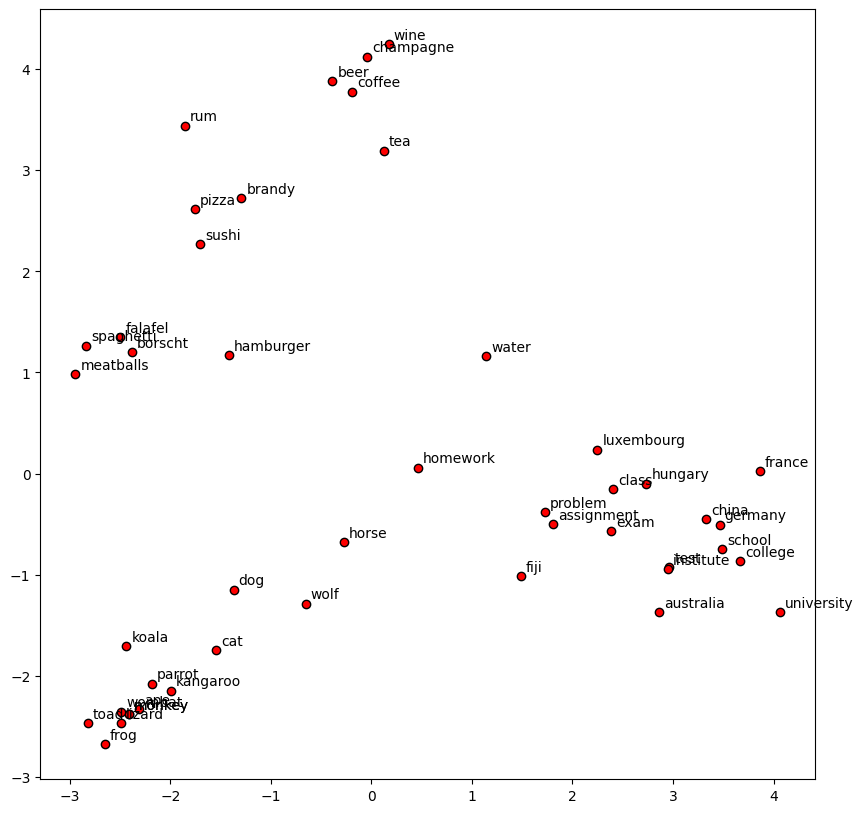

In [26]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [27]:
display_pca_scatterplot(model, sample=300, figsize=(20, 20))

AttributeError: ignored

In [ ]:
model.get_vector("jabberwockyy")

## Ejercicio

Probar esto mismo pero con el modelo de `fasttext`. Chequear estar cargando el `bin` (si no se puede con gensim, probar instalando el paquete `fasttext`)